# PDA data science - Yahoo Finance

### Notebook 3: by Michael Ferrie, March 2022

## Introduction to API's

For those who might be unfamiliar, API stands for Application Programming Interface. An API is actually an
interface that has a set of functions. These set of functions allow programmers to acquire some specific
features or the data of an application. Web API is an API as the name suggests, it can be accessed over the
web using the HTTP protocol. It is a framework that helps you to create and develop HTTP based
RESTFUL services. Once we can access an API programmatically we can create requests to send to it in
order to return data that is useful to us. Many companies offer useful public API's and python allows us to
connect to these.

## Yahoo Finance

In [1]:
#![alt text here](media/yahoo_logo.jpg)

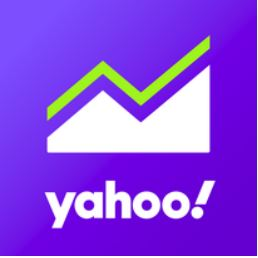

In [2]:
from IPython.display import Image

Image(filename='media/yahoo_logo.jpg') 

In [3]:
# Official yfinance documentation - https://github.com/ranaroussi/yfinance

Yahoo Finance used to have their own official API, but this was decommissioned in May 2017, following
wide-spread misuse of data. These days a range of unofficial APIs and libraries exist to access the same
data, including yfinance.

The project yfinance was developed by <a href="https://aroussi.com/about" target="_blank">Ran Aroussi</a> and offers a replacement for the old Yahoo API and we
can use it with Python to download market data from Yahoo! finance. Before getting started you should
install the library with pip:

`pip install yfinance`

With yfinance we can obtain historical and real time data for a variety of financial markets and products, as
shown on <a href="https://finance.yahoo.com/" target="_blank">Yahoo Finance</a>.

A stock ticker reports transaction and price data, these tickers, update continuously throughout the day.
Have a look at the list of <a href="https://finance.yahoo.com/trending-tickers" target="_blank">tickers</a>. 

OHLC is a financial term for Open Close Low High, this is the value of a stock when the market opens and
closes and the lowest point and highest point in a particular duration.

Read through the notebook and run each of the examples then answer the [questions](#questions) at the end.

## Getting a reply from the API

* First we will import the yfinance library, then using the Ticker module, we can search for information
on Google, they have the abbreviation GOOG, run the following you should get a response from the
API. The Ticker module, allows you to access ticker data in a more Pythonic way. Ticker.info provides
us with a lot of data on a company, have a look.

In [4]:
#!pip install yfinance --upgrade --no-cache-dir

In [5]:
# import library
import yfinance as yf

# assign data to a variable, then print result
goog = yf.Ticker("GOOG")
print(goog.info)

{'zip': '94043', 'sector': 'Communication Services', 'fullTimeEmployees': 163906, 'longBusinessSummary': 'Alphabet Inc. provides various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment offers products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube non-advertising services. The Google Cloud segment offers infrastructure, platform, and other services; Google Workspace that include cloud-based collaboration tools for enterprises, such as Gmail, Docs, Drive, Calendar, and Meet; and other servi

## Specifying date ranges

We can specify a date range for data to be returned, The full range of intervals available are:

1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [6]:
# specify 3 days with '3d' of data from the API
data = yf.download(['GOOG'], period='3d')
print(data)

# the data comes from the API as a pandas dataframe
print(type(data))

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-05-19  2236.820068  2271.750000  2209.360107  2214.909912  2214.909912   
2022-05-20  2241.709961  2251.000000  2127.459961  2186.260010  2186.260010   
2022-05-23  2202.080078  2240.110107  2183.084961  2233.330078  2233.330078   

             Volume  
Date                 
2022-05-19  1459600  
2022-05-20  1878100  
2022-05-23  1577911  
<class 'pandas.core.frame.DataFrame'>


## Access Microsoft Finances

Here is how to get some data on Microsoft, we will explore some of the options of the library.All of the
available options are here: https://pypi.org/project/yfinance/

In [7]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show major holders
msft.major_holders

# show cashflow
msft.cashflow

# print some of the data
print(msft.cashflow)
print(msft.major_holders)

# show the data type
print(type(msft.cashflow))

                                             2021-06-30    2020-06-30  \
Investments                                2.876000e+09  6.980000e+09   
Change To Liabilities                      7.431000e+09  5.230000e+09   
Total Cashflows From Investing Activities -2.757700e+10 -1.222300e+10   
Net Borrowings                            -3.750000e+09 -5.518000e+09   
Total Cash From Financing Activities      -4.848600e+10 -4.603100e+10   
Change To Operating Activities             1.160000e+09 -6.730000e+08   
Issuance Of Stock                          1.693000e+09  1.343000e+09   
Net Income                                 6.127100e+10  4.428100e+10   
Change In Cash                             6.480000e+08  2.220000e+09   
Repurchase Of Stock                       -2.738500e+10 -2.296800e+10   
Effect Of Exchange Rate                   -2.900000e+07 -2.010000e+08   
Total Cash From Operating Activities       7.674000e+10  6.067500e+10   
Depreciation                               1.090000

## Multiple stocks

We can download data for one ticker using the Ticker object and multiple tickers using the download
method.

In [8]:
# get data for google and meta for one month
df = yf.download(['GOOG','META'], period='1mo')

# use head to show only the top of the dataframe
df.head()

[*********************100%***********************]  2 of 2 completed


Adj Close               Close                High          \
                   GOOG   META         GOOG   META         GOOG    META   
Date                                                                      
2022-04-25  2465.000000  10.08  2465.000000  10.08  2465.560059  10.090   
2022-04-26  2390.120117   9.63  2390.120117   9.63  2455.000000  10.010   
2022-04-27  2300.409912   9.47  2300.409912   9.47  2350.000000   9.750   
2022-04-28  2388.229980   9.94  2388.229980   9.94  2408.770020  10.015   
2022-04-29  2299.330078   9.60  2299.330078   9.60  2379.199951  10.125   

                    Low                Open          Volume             
                   GOOG   META         GOOG   META     GOOG       META  
Date                                                                    
2022-04-25  2375.385010  9.760  2388.590088   9.76  1726100   852138.0  
2022-04-26  2383.237061  9.620  2455.000000  10.01  2469700  1008295.0  
2022-04-27  2262.485107  9.430  2287.459961   9.54  3111900   825276.0  
2022-04-28  2302.877930  9.495  2342.300049   9.77  1839500   785633.0  
2022-04-29  2293.879883  9.570  2351.560059   9.79  1683500   594323.0

In [9]:
# Specify the date range and group by ticker
# Remember dates are in american middle endian
df = yf.download(['GOOG','META'], start='2022-01-01', end='2022-01-31', group_by='ticker')
df.head()

[*********************100%***********************]  2 of 2 completed


GOOG                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2022-01-03  2889.510010  2911.000000  2870.050049  2901.489990  2901.489990   
2022-01-04  2911.010010  2932.199951  2876.322998  2888.330078  2888.330078   
2022-01-05  2883.620117  2885.959961  2750.469971  2753.070068  2753.070068   
2022-01-06  2749.949951  2793.719971  2735.270020  2751.020020  2751.020020   
2022-01-07  2758.100098  2765.094971  2715.780029  2740.090088  2740.090088   

                      META                                           
             Volume   Open    High    Low  Close Adj Close   Volume  
Date                                                                 
2022-01-03  1260700  15.36  15.360  15.04  15.25     15.25  2271695  
2022-01-04  1146400  15.30  15.300  14.69  14.91     14.91  3030653  
2022-01-05  2482100  14.79  14.860  14.24  14.24     14.24  3229326  
2022-01-06  1452500  14.19  14.435  13.94  14.28     14.28  2934433  
2022-01-07   970400  14.28  14.440  14.01  14.13     14.13  1947869

## Bitcoin value in USD

Let's have a look at some Bitcoin data, this will pull the Bitcoin value for the first week in February 2022, we
can set the interval to 1 hour so that we can see the value change.

In [10]:
df = yf.download(['BTC-USD'], start='2022-02-01', end='2022-02-07', interval='1h')
df.head()
print(df)

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
2022-02-01 06:00:00+00:00  38548.785156  38548.785156  38318.382812   
2022-02-01 07:00:00+00:00  38345.660156  38459.261719  38331.550781   
2022-02-01 08:00:00+00:00  38447.453125  38580.332031  38439.824219   
2022-02-01 09:00:00+00:00  38584.398438  39026.789062  38316.343750   
2022-02-01 10:00:00+00:00  38321.250000  38346.566406  38113.664062   
...                                 ...           ...           ...   
2022-02-07 01:00:00+00:00  41864.382812  42195.535156  41759.636719   
2022-02-07 02:00:00+00:00  42128.640625  42587.976562  42111.945312   
2022-02-07 03:00:00+00:00  42435.132812  42866.273438  42393.390625   
2022-02-07 04:00:00+00:00  42862.535156  42869.886719  42726.011719   
2022-02-07 05:00:00+00:00  42812.578125  42873.863281  42745.890625   

                                  Close     Adj Close      Volume  
2022-02-01

## Get some statistics from the data

Once we get the data into a pandas dataframe we can run many possible operations on it, have a look at
the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/frame.html" target="_blank">list</a>. There are so many possibilities, the trick is being able to understand the documentation so you can
use them. Here are some examples:

In [11]:
# Describe will give you an overview of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02
mean,39351.716498,39494.089681,39241.378662,39379.919379,39379.919379,2.174955e+08
std,1971.054152,1979.233708,1980.954775,1991.327300,1991.327300,4.705450e+08
min,36431.238281,36638.007812,36375.539062,36430.933594,36430.933594,0.000000e+00
25%,37486.617188,37647.432617,37425.184570,37481.359375,37481.359375,0.000000e+00
50%,38619.632812,38802.931641,38503.369141,38637.738281,38637.738281,0.000000e+00
75%,41508.429688,41599.894531,41422.600586,41513.822266,41513.822266,2.523996e+08
max,42862.535156,42873.863281,42745.890625,42866.273438,42866.273438,4.199303e+09


In [12]:
# Access a specific column in the data with []
print(df['High'].mean())
print(df['High'].min())
print(df['High'].max())
print(df['High'].median())

39494.089680989586
36638.0078125
42873.86328125
38802.931640625


## Visualise the data

Pandas has a simple plot function and it will let us access specific columns in the dataframe, it understands
the shape of the data and it is easy to work with. This will allow us to see the Bitcoin value in USD over the
week that we have data for. Something obviously happened on the 4th of February to cause the spike. The
best day to buy bitcoin that week would have been on the 3rd.

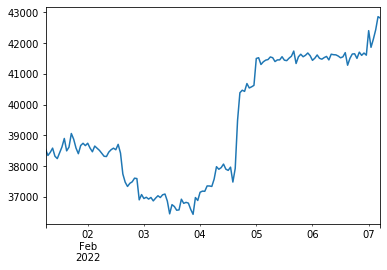

In [13]:
# Plot the open column
df["Open"].plot()

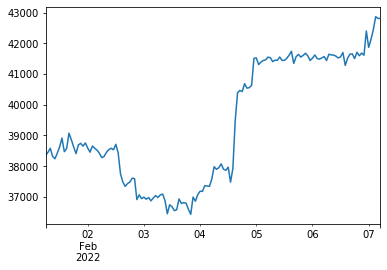

In [14]:
# Plot the close column
df["Close"].plot()

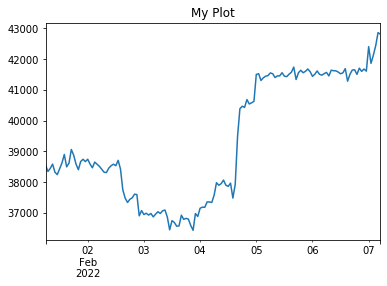

In [15]:
# Adding some extra details to the plot
df['Open'].plot(kind='line', title="My Plot", x="Date", y="Value in USD")

## Multiple line Plots

Now if we want to compare two plots side by side we need another library, if you have not already, install
Matplotlib, we need to use pyplot from this library for this next task.

`pip install matplotlib`

First we want to pass multiple columns in the data frame to the plot function, and assign them a colour, then
we can add a title and some labels, and a legend.

In [16]:
# import pyplot
import matplotlib.pyplot as plt

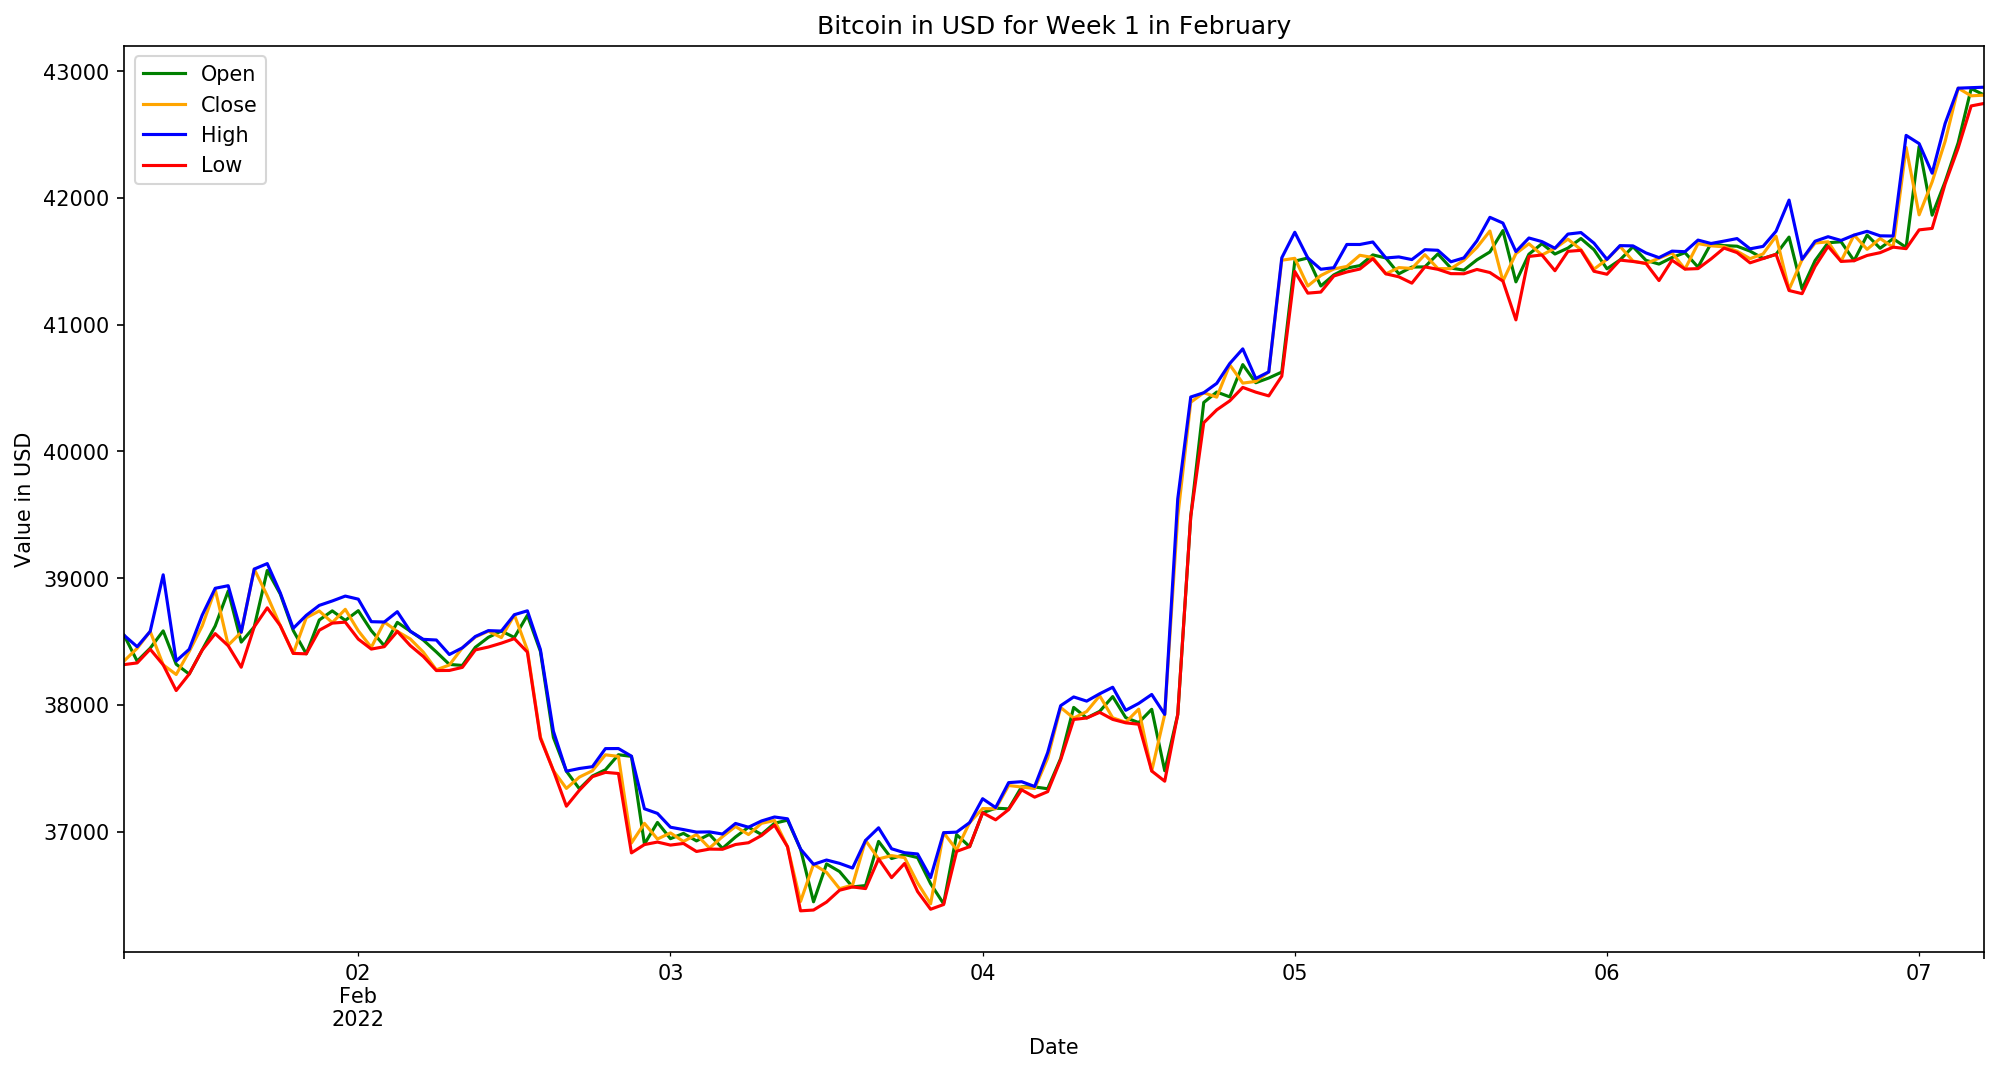

In [17]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=150)

# use the plot method on each of the columsn in the dataframe
df['Open'].plot(label='Open', color='green')
df['Close'].plot(label='Close', color='orange')
df['High'].plot(label='High', color='blue')
df['Low'].plot(label='Low', color='red')

# adding title to the plot
plt.title('Bitcoin in USD for Week 1 in February')
 
# adding labels to the axes, add a legend
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.legend()

## Figure size

Our multi line plot looks a bit squashed, here are some options to make it better, `figsize` lets us specify
the size of the chart in **inches**, by default all charts come out as 6.4x4.8 inches. The chart will look better at
a bigger size, let us also specify the quality of the image as 150 dpi. The plot will be easier to see if we
increase this, but it might take slightly longer to render.

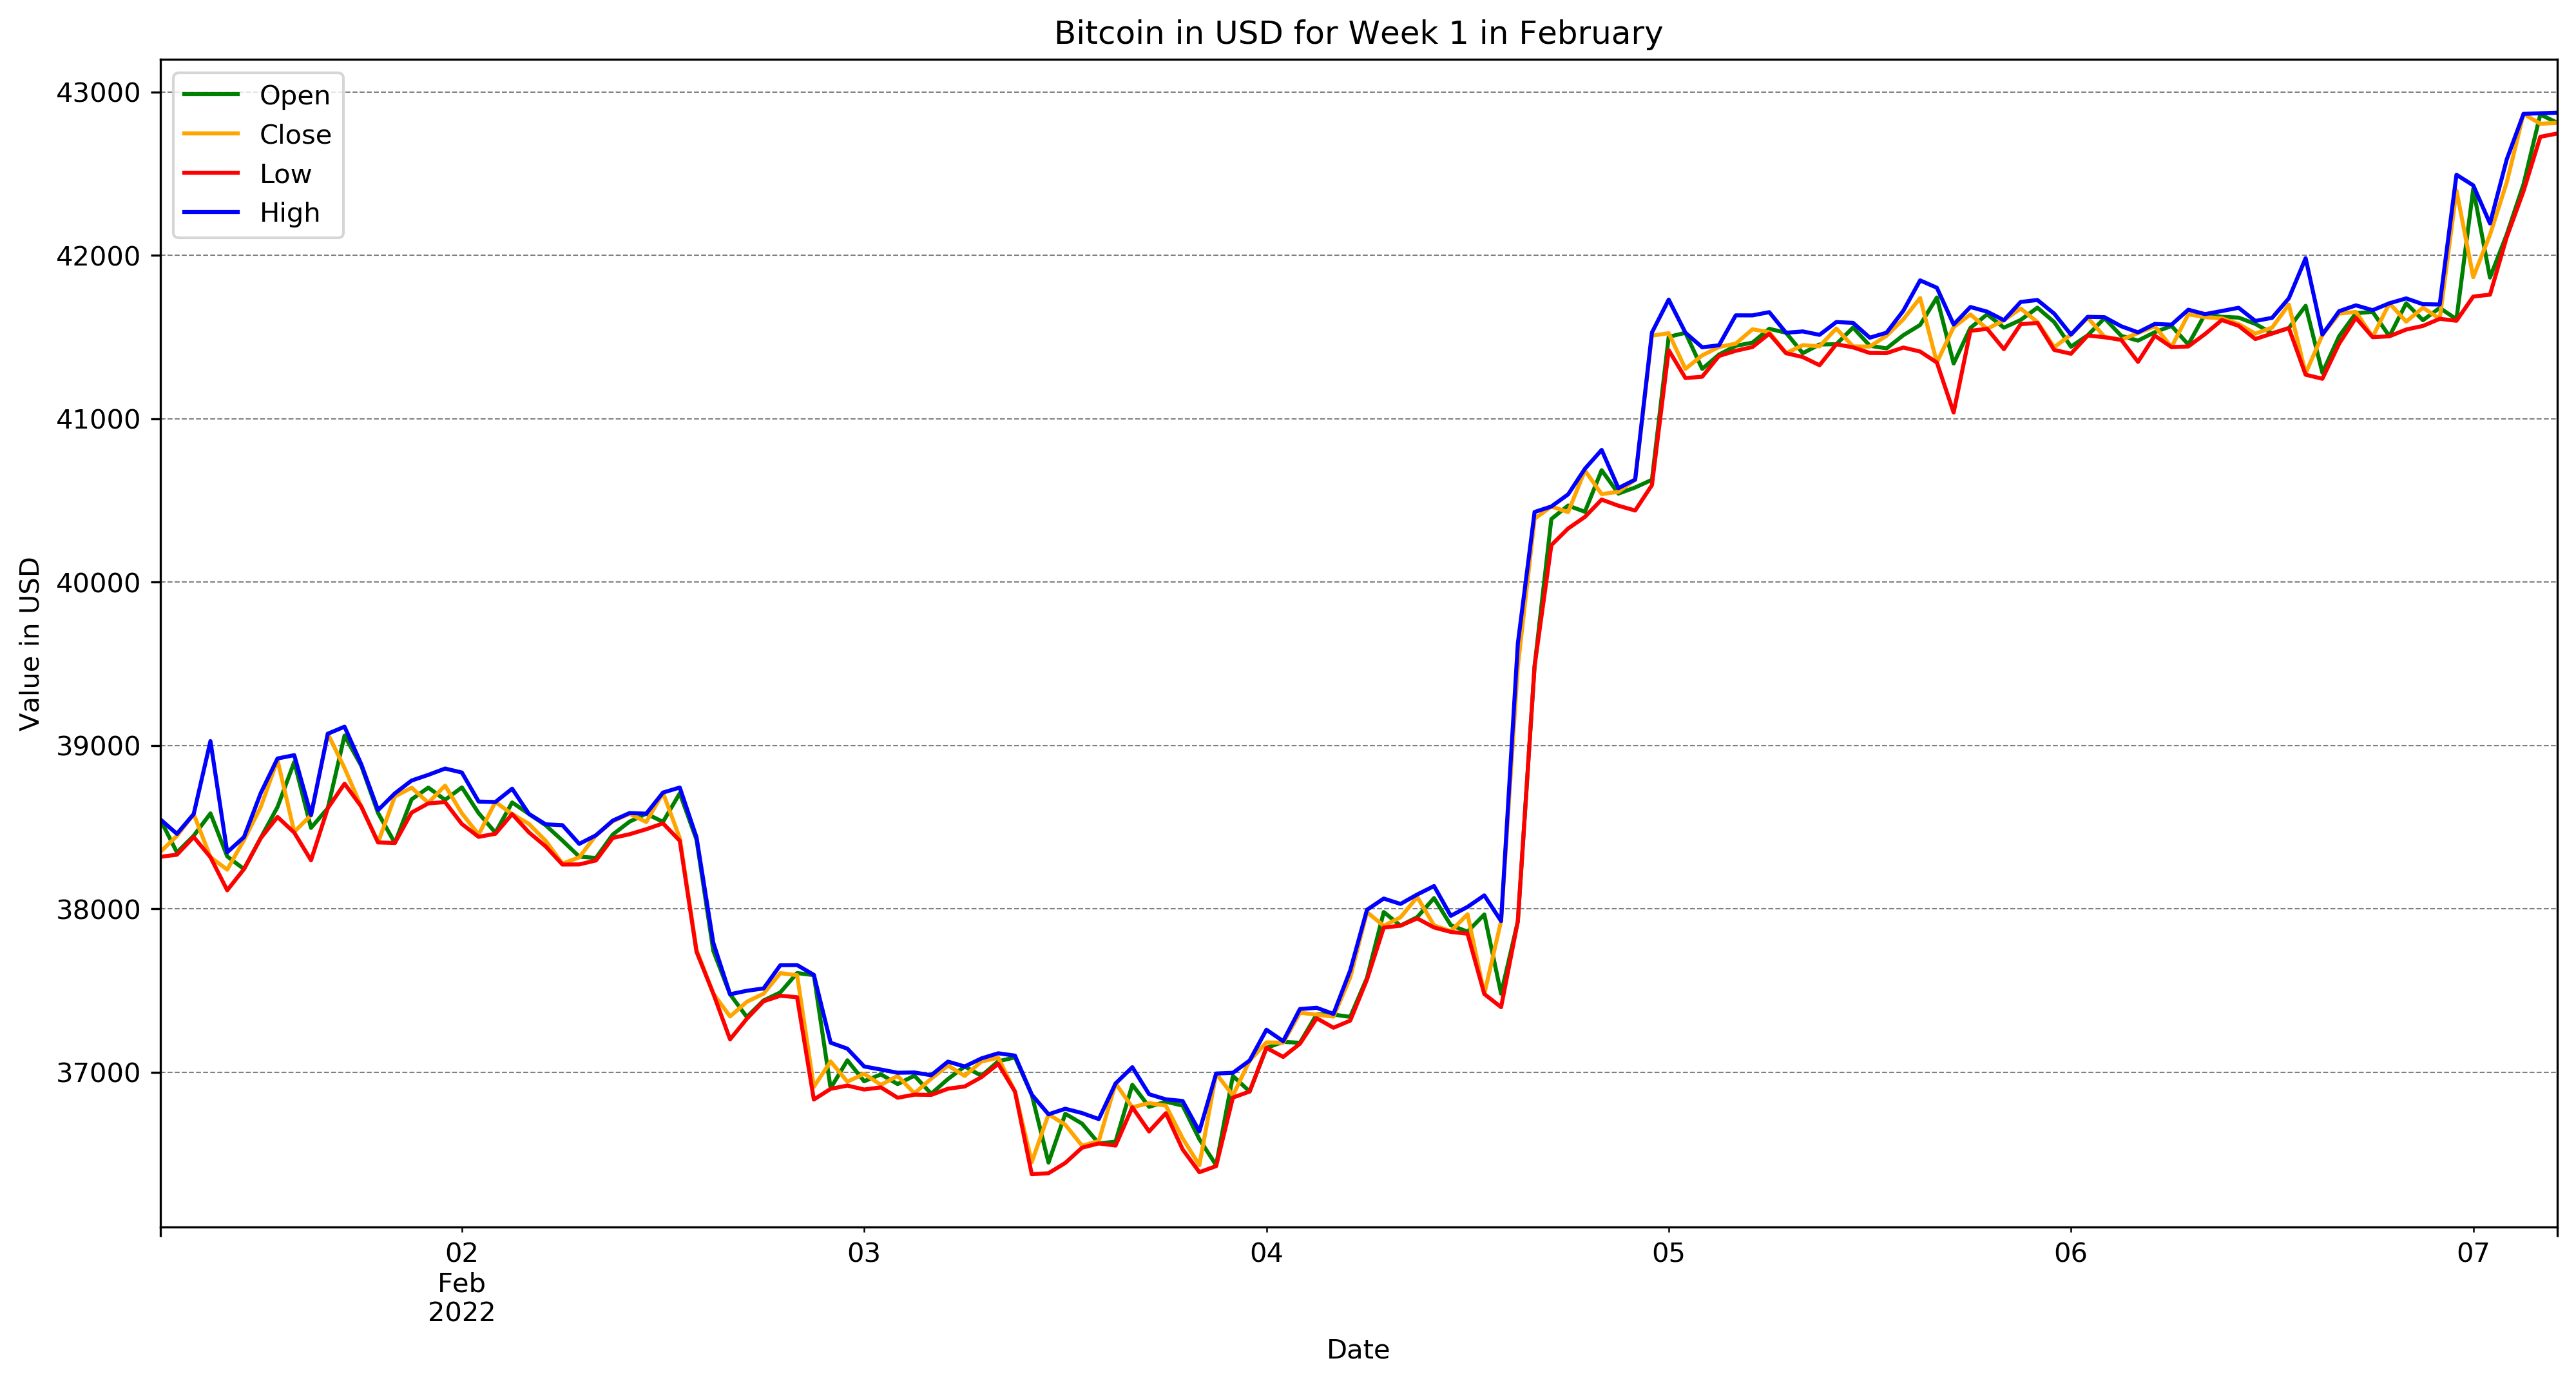

In [18]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=300)

# use the plot method on each of the columsn in the dataframe
df['Open'].plot(label='Open', color='green')
df['Close'].plot(label='Close', color='orange')
df['Low'].plot(label='Low', color='red')
df['High'].plot(label='High', color='blue')
# adding title to the plot
plt.title('Bitcoin in USD for Week 1 in February')
 
# adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

## Questions
<a id='questions'></a>

Add your solution to the questions below

### Plot the Bitcoin value in USD using the high column for the whole month of January 2021, set the interval to 1 hour?

In [19]:
# your answer below this line

In [20]:
df_jan = yf.download(['BTC-USD'], start='2021-01-01', end='2021-01-31', interval='1h')
df_jan.head()
print(df_jan)

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
2021-01-01 06:00:00+00:00  29198.158203  29275.232422  29159.599609   
2021-01-01 07:00:00+00:00  29171.677734  29207.472656  28985.558594   
2021-01-01 08:00:00+00:00  29129.400391  29157.390625  28956.306641   
2021-01-01 09:00:00+00:00  29079.804688  29309.498047  29047.564453   
2021-01-01 10:00:00+00:00  29232.681641  29337.117188  29222.396484   
...                                 ...           ...           ...   
2021-01-31 01:00:00+00:00  34052.703125  34192.070312  33989.015625   
2021-01-31 02:00:00+00:00  34184.191406  34198.832031  33745.480469   
2021-01-31 03:00:00+00:00  33783.468750  34004.488281  33721.757812   
2021-01-31 04:00:00+00:00  33916.722656  34042.671875  33829.109375   
2021-01-31 05:00:00+00:00  34021.480469  34021.480469  33701.449219   

                                  Close     Adj Close     Volume  
2021-01-01 

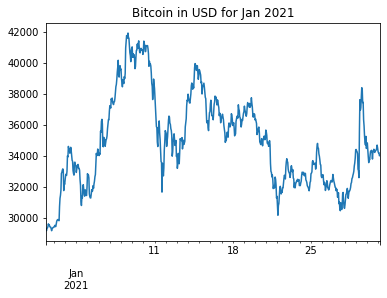

In [21]:
df_jan['High'].plot(kind='line', title='Bitcoin in USD for Jan 2021', x='Date', y='Value in USD')

### Create a plot of the Bitcoin value in USD using the high column for the whole year of 2021, set the interval to 1 day?

In [22]:
# your answer below this line

In [23]:
df_y21 = yf.download(['BTC-USD'], start='2021-01-01', end='2021-12-31', interval='1d')
df_y21.head()
print(df_y21)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   
...                  ...           ...           ...           ...   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   
2021-12-31  47169.371094  48472.527344  45819.953125  46306.445312   

               Adj C

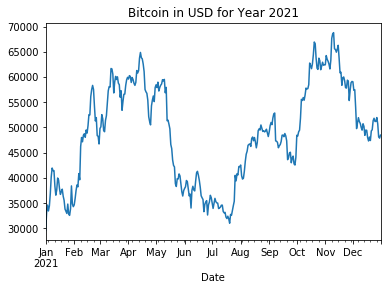

In [24]:
df_y21['High'].plot(kind='line', title='Bitcoin in USD for Year 2021', x='Date', y='Value in USD')

## Plot the Bitcoin value in USD using the close column for as far back as you can get data for, this could be a number of years?

In [25]:
# your answer below this line

In [26]:
df_complete = yf.download(['BTC-USD'])
df_complete.head()
print(df_complete)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-05-19  28720.359375  30430.751953  28708.955078  30314.333984   
2022-05-20  30311.119141  30664.976562  28793.605469  29200.740234   
2022-05-21  29199.859375  29588.869141  29027.394531  29432.226562   
2022-05-22  29432.472656  30425.861328  29275.183594  30323.722656   
2022-05-24  29083.347656  29250.044922  29083.347656  29250.044922   

               Adj C

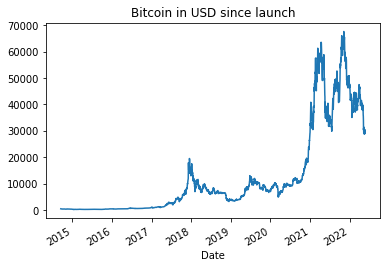

In [27]:
df_complete['Close'].plot(kind='line', title='Bitcoin in USD since launch', x='Year', y='Value in USD')

## Go to the <a href="https://finance.yahoo.com/cryptocurrencies" target="_blank">Cryptocurency tickers list</a> find the name of the Etherium USD ticker and then create a plot of the value of Etherium in USD using the high column for the whole year of 2021, set the interval to 1 day?

In [28]:
# your answer below this line

In [29]:
df_eth_y21 = yf.download(['ETH-USD'], start='2021-01-01', end='2021-12-31', interval='1d')
df_eth_y21.head()
print(df_eth_y21)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-01-01   737.708374   749.201843   719.792236   730.367554   730.367554   
2021-01-02   730.402649   786.798462   718.109497   774.534973   774.534973   
2021-01-03   774.511841  1006.565002   771.561646   975.507690   975.507690   
2021-01-04   977.058838  1153.189209   912.305359  1040.233032  1040.233032   
2021-01-05  1041.498779  1129.371460   986.811279  1100.006104  1100.006104   
...                 ...          ...          ...          ...          ...   
2021-12-27  4064.746338  4126.001465  4033.492432  4037.547607  4037.547607   
2021-12-28  4037.538086  4037.538086  3769.280029  3800.893066  3800.893066   
2021-12-29  3797.436279  3827.981934  3612.795898  3628.531738  3628.531738   
2021-12-30  3632.219727  3767.559814  3595.204834  3713.852051

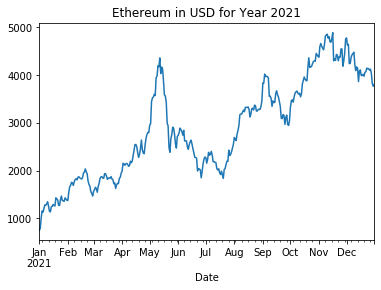

In [30]:
df_eth_y21['High'].plot(kind='line', title='Ethereum in USD for Year 2021', x='Date', y='Value in USD')

## Go to the <a href="https://finance.yahoo.com/most-active" target="_blank">Most active tickers list</a> and find the top two most active stocks. Create a plot that compares their high value for every day in 2021. The plot should have two lines in different colours, there should be a legend and axis labels.

In [31]:
# your answer below this line

In [32]:
## Note :
## From the website, AMD and AAPL stocks were found to be most active as on 23-May-2022 
## with volumes 127.336M and 117.726M respectively.

In [33]:
df_most_active = yf.download(['AMD','AAPL'], start='2021-01-01', end='2021-12-31', group_by='ticker')
df_most_active.head()

[*********************100%***********************]  2 of 2 completed


AMD                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2021-01-04  92.110001  96.059998  90.919998  92.300003  92.300003  51802600   
2021-01-05  92.099998  93.209999  91.410004  92.769997  92.769997  34208000   
2021-01-06  91.620003  92.279999  89.459999  90.330002  90.330002  51911700   
2021-01-07  91.330002  95.510002  91.199997  95.160004  95.160004  42897200   
2021-01-08  95.980003  96.400002  93.269997  94.580002  94.580002  39816400   

                  AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  128.264999   
2021-01-05  128.889999  131.740005  128.429993  131.009995  129.850845   
2021-01-06  127.720001  131.050003  126.379997  126.599998  125.479843   
2021-01-07  128.360001  131.630005  127.860001  130.919998  129.761612   
2021-01-08  132.429993  132.630005  130.229996  132.050003  130.881653   

                       
               Volume  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200

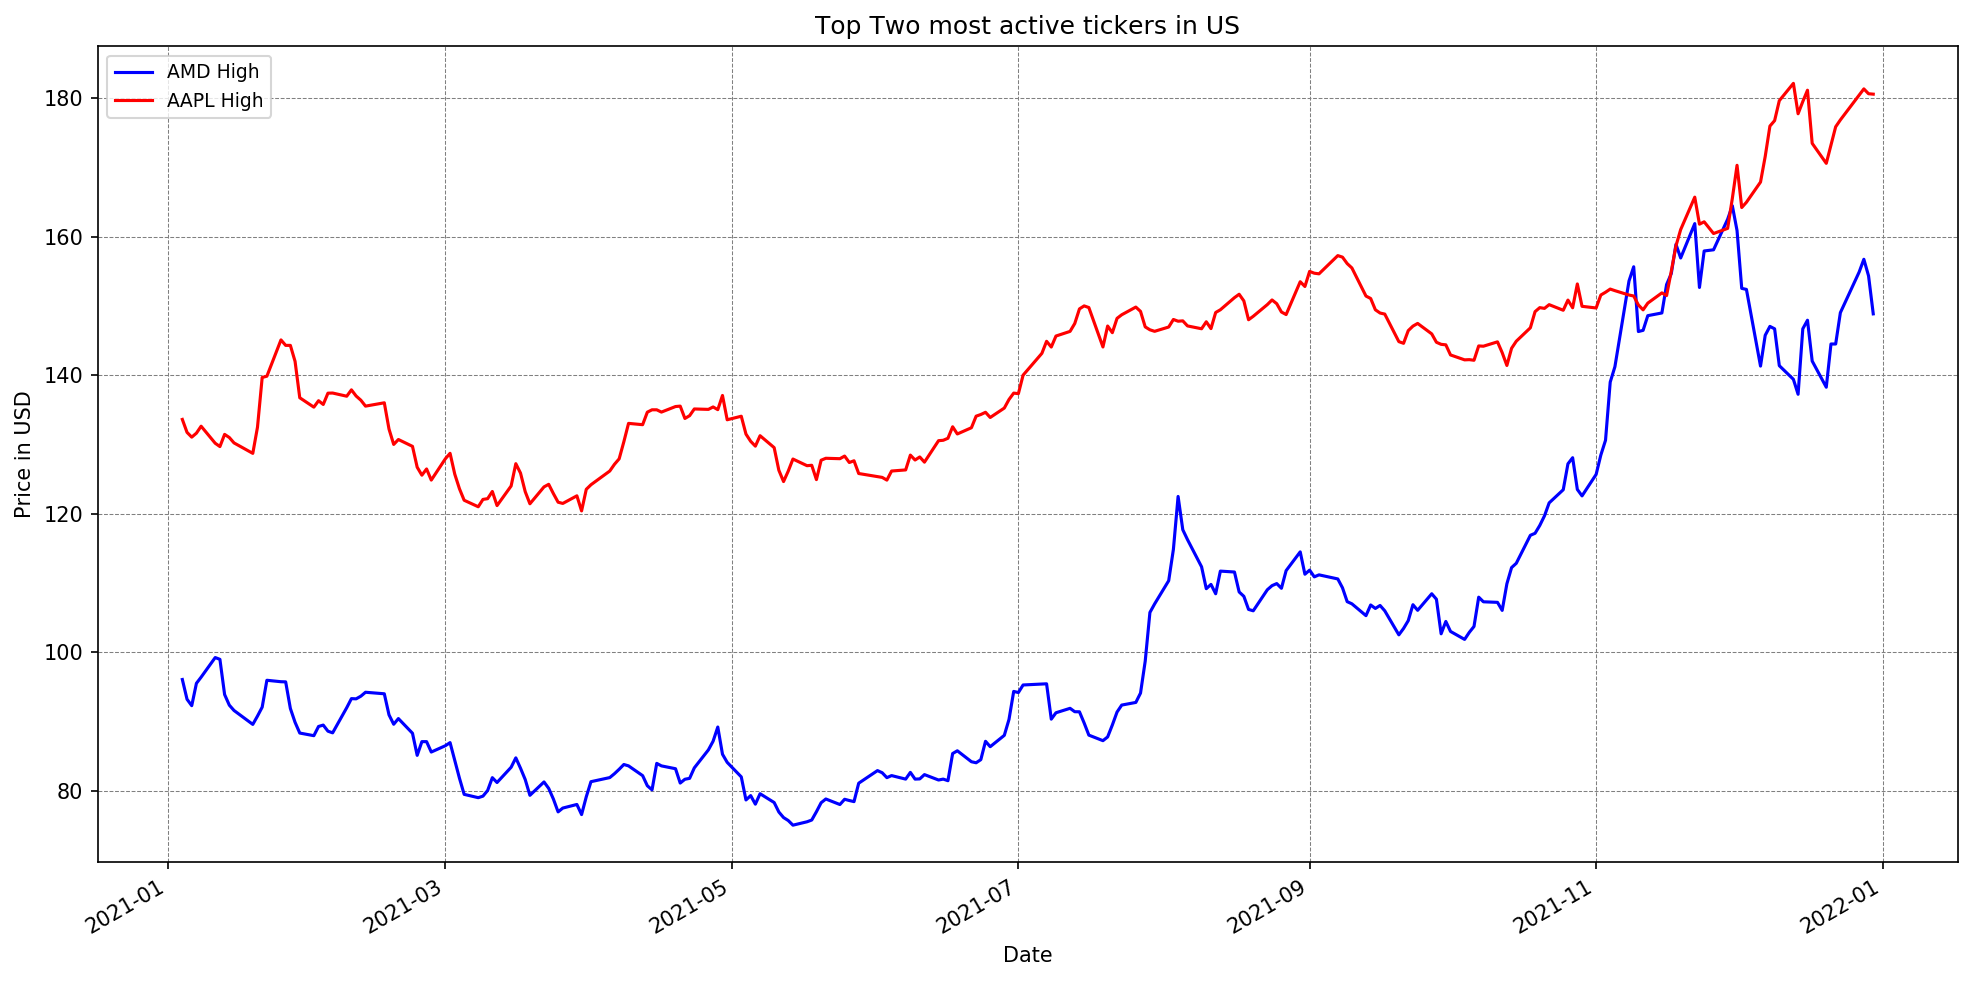

In [34]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=150)

# use the plot method on each of the columns in the dataframe
df_most_active['AMD']['High'].plot(label='AMD High', color='blue')
df_most_active['AAPL']['High'].plot(label='AAPL High', color='red')

# adding title to the plot
plt.title('Top Two most active tickers in US')
 
# adding labels to the axes, add a legend
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc='upper left', prop={'size': 9})

## Adapt your plot from the previous question to show the high value of the top 4 stocks in the list?

In [35]:
# your answer below this line

In [36]:
df_most_active_four = yf.download(['AMD','AAPL', 'DIDI', 'BAC'], start='2021-01-01', end='2021-12-31', group_by='ticker')
df_most_active_four.head()

[*********************100%***********************]  4 of 4 completed


DIDI                                        AAPL              \
           Open High Low Close Adj Close Volume        Open        High   
Date                                                                      
2021-01-04  NaN  NaN NaN   NaN       NaN    NaN  133.520004  133.610001   
2021-01-05  NaN  NaN NaN   NaN       NaN    NaN  128.889999  131.740005   
2021-01-06  NaN  NaN NaN   NaN       NaN    NaN  127.720001  131.050003   
2021-01-07  NaN  NaN NaN   NaN       NaN    NaN  128.360001  131.630005   
2021-01-08  NaN  NaN NaN   NaN       NaN    NaN  132.429993  132.630005   

                                    ...        BAC                        \
                   Low       Close  ...        Low      Close  Adj Close   
Date                                ...                                    
2021-01-04  126.760002  129.410004  ...  29.750000  30.030001  29.319450   
2021-01-05  128.429993  131.009995  ...  29.910000  30.260000  29.544006   
2021-01-06  126.379997  126.599998  ...  31.360001  32.150002  31.389288   
2021-01-07  127.860001  130.919998  ...  32.840000  32.860001  32.082489   
2021-01-08  130.229996  132.050003  ...  32.110001  32.529999  31.760292   

                             AMD                                              \
               Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2021-01-04   51483900  92.110001  96.059998  90.919998  92.300003  92.300003   
2021-01-05   48507000  92.099998  93.209999  91.410004  92.769997  92.769997   
2021-01-06  107002800  91.620003  92.279999  89.459999  90.330002  90.330002   
2021-01-07   74358500  91.330002  95.510002  91.199997  95.160004  95.160004   
2021-01-08   44641400  95.980003  96.400002  93.269997  94.580002  94.580002   

                      
              Volume  
Date                  
2021-01-04  51802600  
2021-01-05  34208000  
2021-01-06  51911700  
2021-01-07  42897200  
2021-01-08  39816400  

[5 rows x 24 columns]

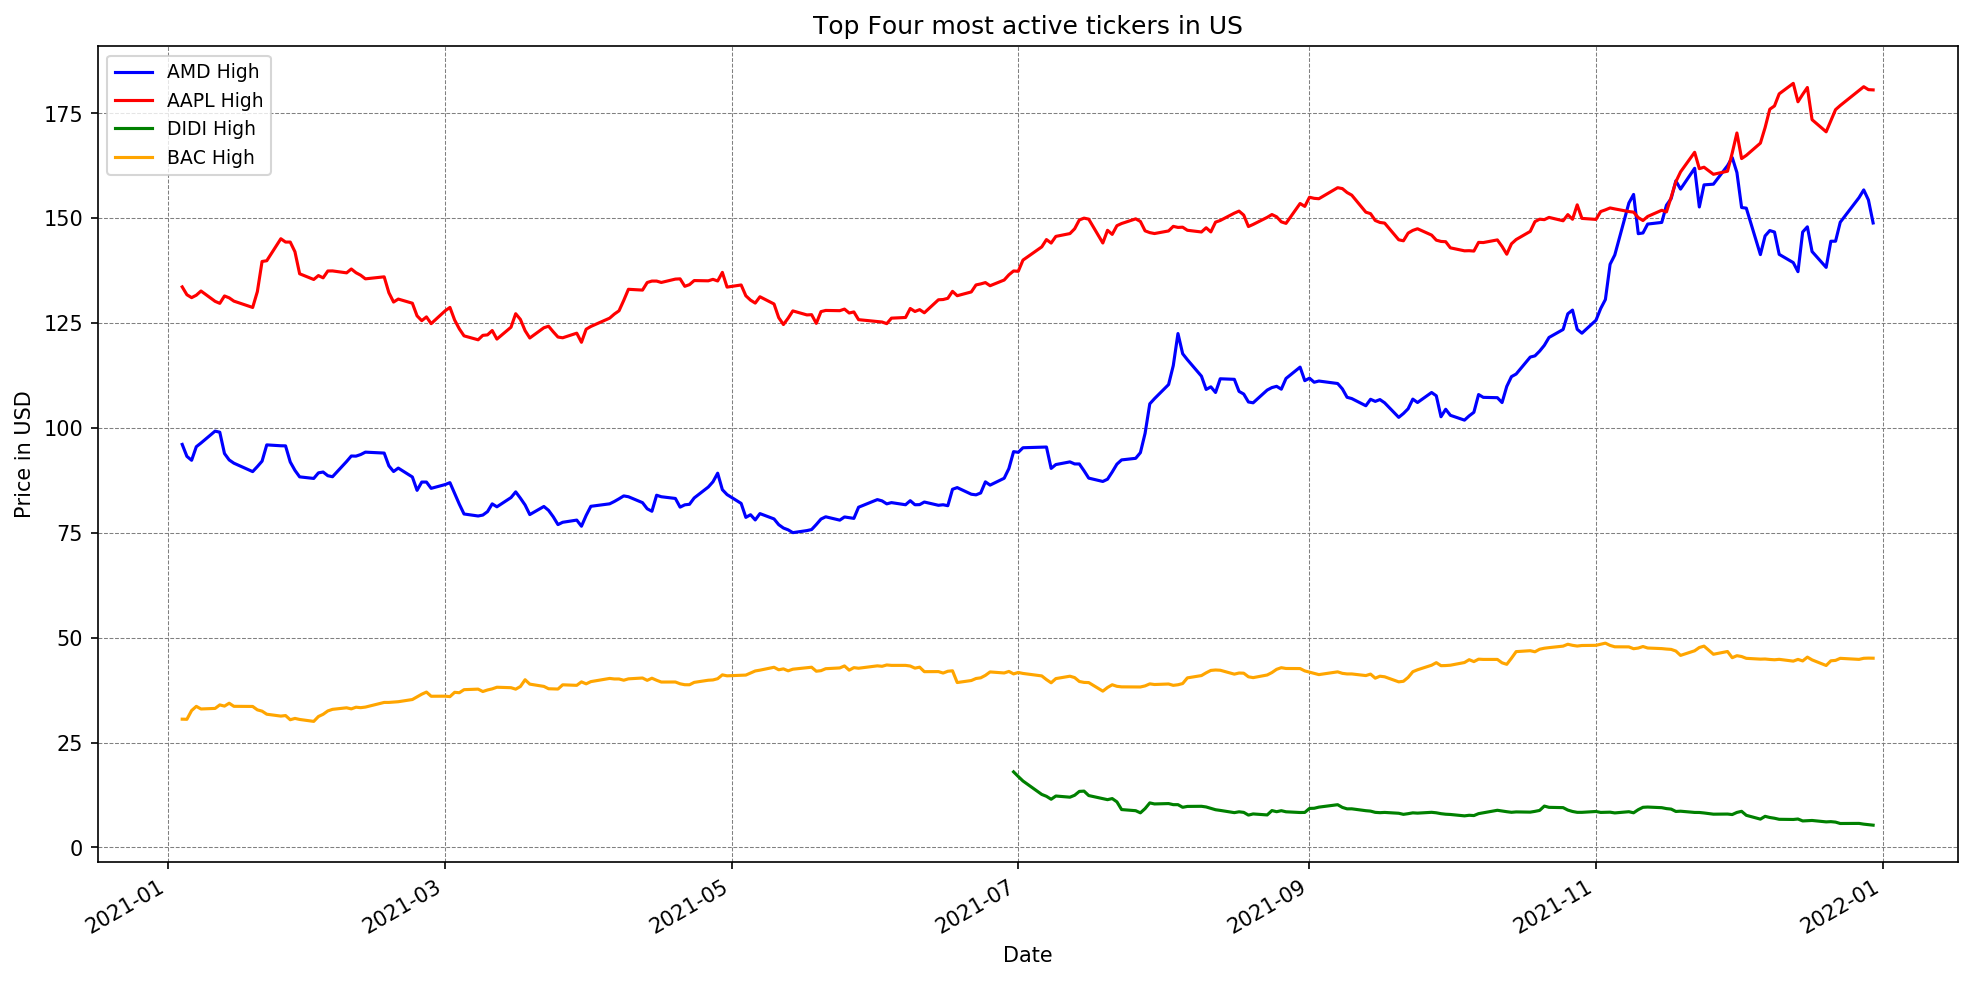

In [37]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=150)

# use the plot method on each of the columns in the dataframe
df_most_active_four['AMD']['High'].plot(label='AMD High', color='blue')
df_most_active_four['AAPL']['High'].plot(label='AAPL High', color='red')
df_most_active_four['DIDI']['High'].plot(label='DIDI High', color='green')
df_most_active_four['BAC']['High'].plot(label='BAC High', color='orange')

# adding title to the plot
plt.title('Top Four most active tickers in US')
plt.rcParams["figure.dpi"] = 100

# adding labels to the axes, add a legend
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc='upper left', prop={'size': 9})

## Go to the <a href="https://finance.yahoo.com/currencies" target="_blank">FIAT Currency tickers list</a> and find the tickers for EUR/USD and GBP/USD, create a plot that shows the value from the close column for the last 3 years every day for each of the tickers.

In [38]:
# your answer below this line

In [39]:
df_forex_two_curs = yf.download(['EURUSD=X','GBPUSD=X'], start='2018-01-01', end='2021-12-31', group_by='ticker')
df_forex_two_curs.head()

[*********************100%***********************]  2 of 2 completed


EURUSD=X                                                 GBPUSD=X  \
                Open      High       Low     Close Adj Close Volume      Open   
Date                                                                            
2018-01-01  1.200495  1.201504  1.199904  1.200495  1.200495      0  1.351607   
2018-01-02  1.201086  1.208094  1.200855  1.201158  1.201158      0  1.351114   
2018-01-03  1.206200  1.206709  1.200495  1.206345  1.206345      0  1.359453   
2018-01-04  1.201129  1.209190  1.200495  1.201043  1.201043      0  1.351169   
2018-01-05  1.206622  1.208459  1.202154  1.206884  1.206884      0  1.355381   

                                                           
                High       Low     Close Adj Close Volume  
Date                                                       
2018-01-01  1.351607  1.348199  1.351607  1.351607      0  
2018-01-02  1.359675  1.350931  1.351132  1.351132      0  
2018-01-03  1.361470  1.349874  1.359619  1.359619      0  
2018-01-04  1.356116  1.350658  1.351132  1.351132      0  
2018-01-05  1.358031  1.352667  1.355289  1.355289      0

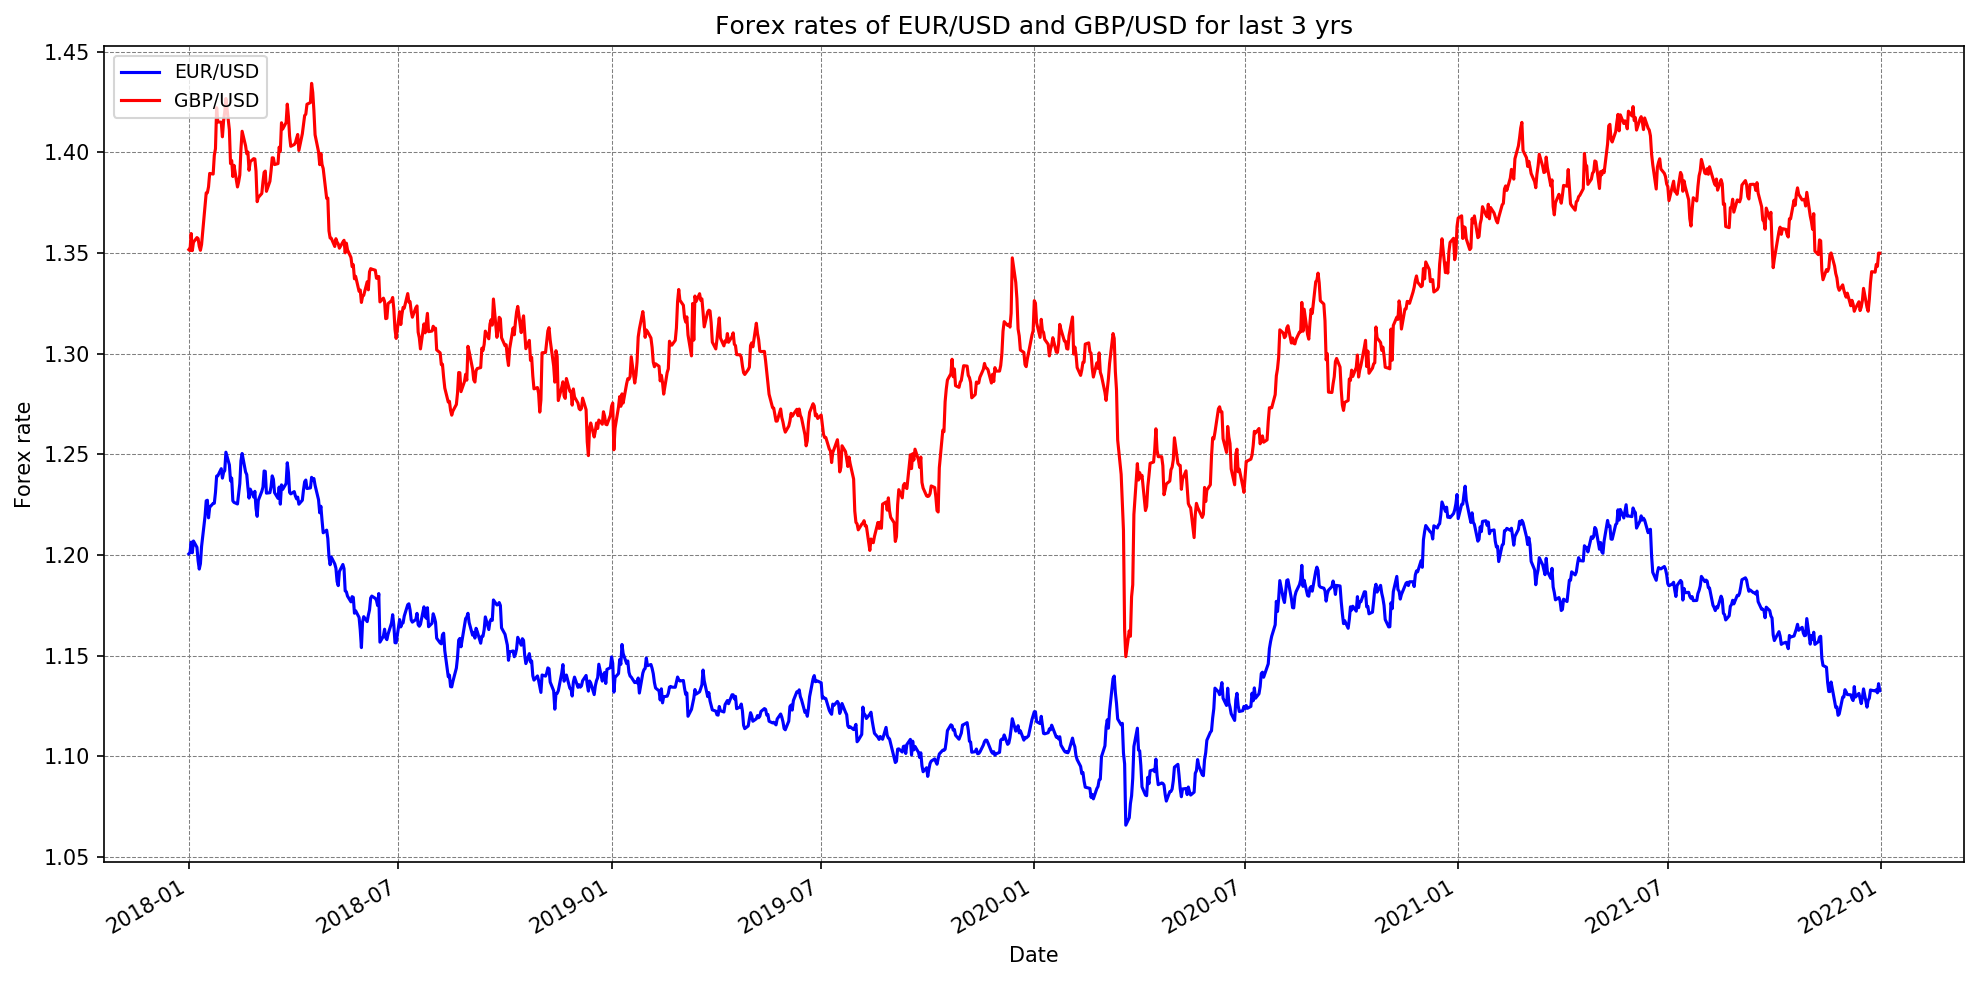

In [40]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=150)

# use the plot method on each of the columns in the dataframe
df_forex_two_curs['EURUSD=X']['Close'].plot(label='EUR/USD', color='blue')
df_forex_two_curs['GBPUSD=X']['Close'].plot(label='GBP/USD', color='red')

# adding title to the plot
plt.title('Forex rates of EUR/USD and GBP/USD for last 3 yrs')

# adding labels to the axes, add a legend
plt.xlabel('Date')
plt.ylabel('Forex rate')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc='upper left', prop={'size': 9})

## Adapt the chart from the previous question to add additional lines for the AUD/USD CAD/USD and NZD/USD, give each line an appropriate colour and add a legend and axis labels, print this chart out in 150dpi and make it 16x8 inches. Add gridlines to the plot?

In [41]:
# your answer below this line

In [42]:
df_forex_five_curs = yf.download(['EURUSD=X','GBPUSD=X','AUDUSD=X','CADUSD=X','NZDUSD=X'], 
                                 start='2018-01-01', end='2021-12-31', group_by='ticker')
df_forex_five_curs.head()

[*********************100%***********************]  5 of 5 completed


EURUSD=X                                                 NZDUSD=X  \
                Open      High       Low     Close Adj Close Volume      Open   
Date                                                                            
2018-01-01  1.200495  1.201504  1.199904  1.200495  1.200495      0  0.711389   
2018-01-02  1.201086  1.208094  1.200855  1.201158  1.201158      0  0.708918   
2018-01-03  1.206200  1.206709  1.200495  1.206345  1.206345      0  0.710071   
2018-01-04  1.201129  1.209190  1.200495  1.201043  1.201043      0  0.708848   
2018-01-05  1.206622  1.208459  1.202154  1.206884  1.206884      0  0.715922   

                                          ...  CADUSD=X                      \
                High       Low     Close  ...       Low     Close Adj Close   
Date                                      ...                                 
2018-01-01  0.721397  0.706115  0.711389  ...  0.791264  0.794862  0.794862   
2018-01-02  0.713089  0.708898  0.708818  ...  0.796394  0.796495  0.796495   
2018-01-03  0.711389  0.707469  0.710021  ...  0.797124  0.799750  0.799750   
2018-01-04  0.715129  0.707569  0.709019  ...  0.796508  0.797010  0.797010   
2018-01-05  0.718752  0.714628  0.715599  ...  0.799226  0.800621  0.800621   

                   GBPUSD=X                                                 
           Volume      Open      High       Low     Close Adj Close Volume  
Date                                                                        
2018-01-01      0  1.351607  1.351607  1.348199  1.351607  1.351607      0  
2018-01-02      0  1.351114  1.359675  1.350931  1.351132  1.351132      0  
2018-01-03      0  1.359453  1.361470  1.349874  1.359619  1.359619      0  
2018-01-04      0  1.351169  1.356116  1.350658  1.351132  1.351132      0  
2018-01-05      0  1.355381  1.358031  1.352667  1.355289  1.355289      0  

[5 rows x 30 columns]

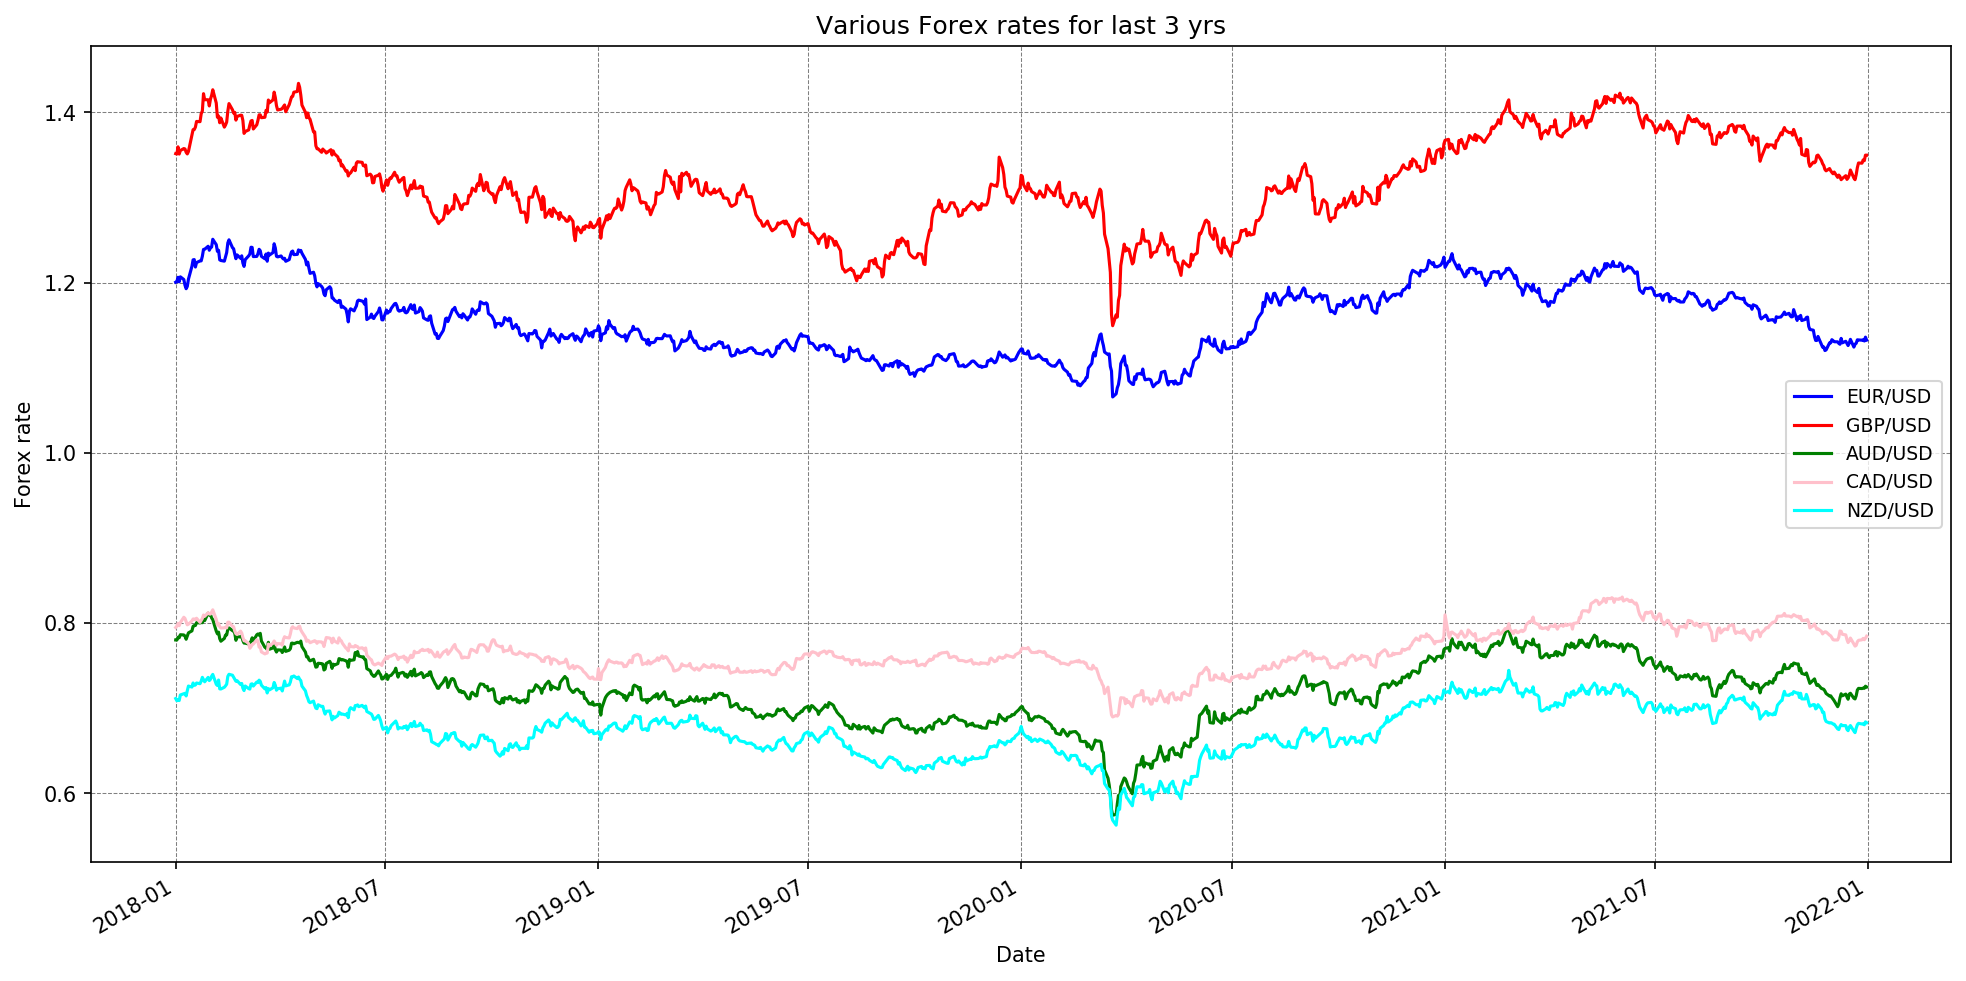

In [43]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=150)

# use the plot method on each of the columns in the dataframe
df_forex_five_curs['EURUSD=X']['Close'].plot(label='EUR/USD', color='blue')
df_forex_five_curs['GBPUSD=X']['Close'].plot(label='GBP/USD', color='red')
df_forex_five_curs['AUDUSD=X']['Close'].plot(label='AUD/USD', color='green')
df_forex_five_curs['CADUSD=X']['Close'].plot(label='CAD/USD', color='pink')
df_forex_five_curs['NZDUSD=X']['Close'].plot(label='NZD/USD', color='cyan')

# adding title to the plot
plt.title('Various Forex rates for last 3 yrs')
# plt.rcParams["figure.dpi"] = 100


# adding labels to the axes, add a legend
plt.xlabel('Date')
plt.ylabel('Forex rate')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.legend(loc='center right', prop={'size': 9})

In [44]:
## End of File